# EDA

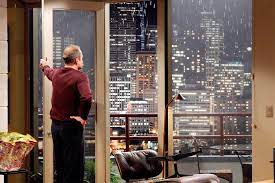

In [112]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [113]:
df = pd.read_csv("data/eda.csv")  # 파일명에 따라 'eda.csv' 또는 'king_county_cleaned.csv'일 수도 있어요
df.head()

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price
0,1,7129300520,98178,3.000,1.000,1.000,1180.000,5650.000,1955,7,2014-10-13,221900.000
1,2,6414100192,98125,3.000,2.250,2.000,2570.000,7242.000,1951,7,2014-12-09,538000.000
2,3,5631500400,98028,2.000,1.000,1.000,770.000,10000.000,1933,6,2015-02-25,180000.000
3,4,2487200875,98136,4.000,3.000,1.000,1960.000,5000.000,1965,7,2014-12-09,604000.000
4,5,1954400510,98074,3.000,2.000,1.000,1680.000,8080.000,1987,8,2015-02-18,510000.000


In [114]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   house_id     21597 non-null  int64  
 2   zipcode      21597 non-null  int64  
 3   bedrooms     21597 non-null  float64
 4   bathrooms    21597 non-null  float64
 5   floors       21597 non-null  float64
 6   sqft_living  21597 non-null  float64
 7   sqft_lot     21597 non-null  float64
 8   yr_built     21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  sold_date    21597 non-null  object 
 11  price        21597 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 2.0+ MB


In [115]:
df.describe()
# std 평균을 중심으로 값이 클수록 평균으로부터 더 멀리 퍼져 있다는 뜻이에요.
# sold date는 string 이여서 빠짐. 

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,10799.000,4580474287.771,98077.952,3.373,2.116,1.494,2080.322,15099.409,1971.000,7.658,540296.574
std,6234.661,2876735715.748,53.513,0.926,0.769,0.540,918.106,41412.637,29.375,1.173,367368.140
min,1.000,1000102.000,98001.000,1.000,0.500,1.000,370.000,520.000,1900.000,3.000,78000.000
25%,5400.000,2123049175.000,98033.000,3.000,1.750,1.000,1430.000,5040.000,1951.000,7.000,322000.000
50%,10799.000,3904930410.000,98065.000,3.000,2.250,1.500,1910.000,7618.000,1975.000,7.000,450000.000
75%,16198.000,7308900490.000,98118.000,4.000,2.500,2.000,2550.000,10685.000,1997.000,8.000,645000.000
max,21597.000,9900000190.000,98199.000,33.000,8.000,3.500,13540.000,1651359.000,2015.000,13.000,7700000.000


In [116]:
df.isna().sum()

id             0
house_id       0
zipcode        0
bedrooms       0
bathrooms      0
floors         0
sqft_living    0
sqft_lot       0
yr_built       0
grade          0
sold_date      0
price          0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

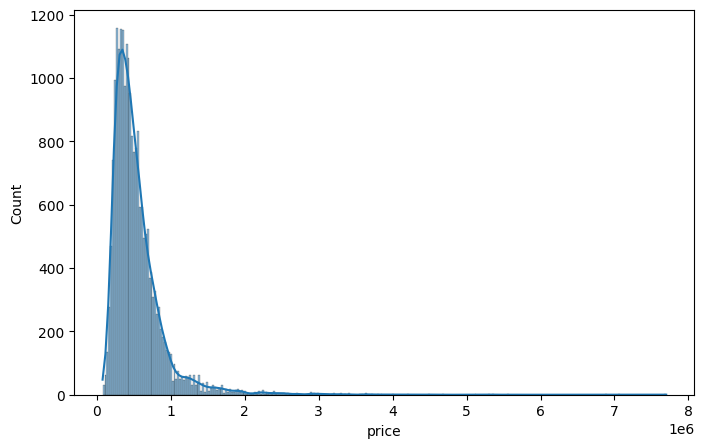

In [117]:
# 가격 분포
sns.histplot(df['price'], kde=True)

<Axes: xlabel='sqft_living', ylabel='price'>

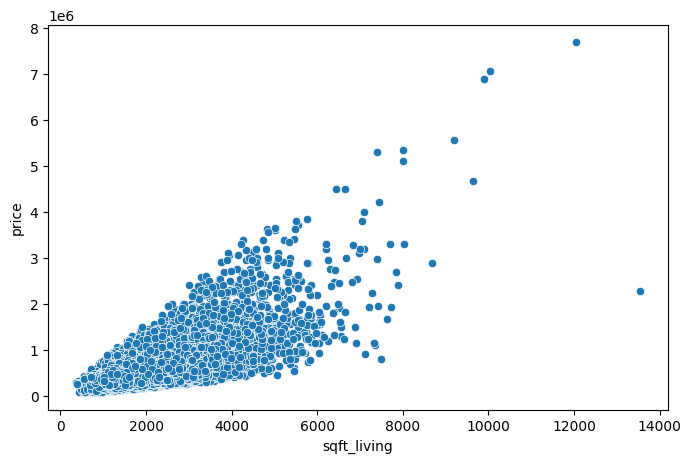

In [118]:
# 평수 vs 가격
sns.scatterplot(x='sqft_living', y='price', data=df)


```
✅ 1. matplotlib의 자동 숫자 축약 표기 규칙
matplotlib은 Y축 숫자가 너무 크면 자동으로 단위를 축약해서 표현합니다.
축약된 단위는 지수 표기법 (scientific notation) 으로 표시돼요:

표기	실제 의미
1e3	천 단위 (1,000)
1e6	백만 단위 (1,000,000)
1e7	천만 단위 (10,000,000)

그래서 Y축에 1e6이 뜬다면,
Y축 숫자들은 실제로 백만 단위로 표현되고 있다는 뜻입니다.

✅ 2. 숫자 크기로 직접 확인하기
python
복사
편집
zipcode_price.max()

그냥 모르겠으면 단위들 곱하면됨. 0.5 X 1,000,000


```

In [119]:
df.isna().sum()

id             0
house_id       0
zipcode        0
bedrooms       0
bathrooms      0
floors         0
sqft_living    0
sqft_lot       0
yr_built       0
grade          0
sold_date      0
price          0
dtype: int64

In [120]:
df["price_per_sqft"] = round(df["price"] / df["sqft_living"], 2)

In [121]:
df

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price,price_per_sqft
0,1,7129300520,98178,3.000,1.000,1.000,1180.000,5650.000,1955,7,2014-10-13,221900.000,188.050
1,2,6414100192,98125,3.000,2.250,2.000,2570.000,7242.000,1951,7,2014-12-09,538000.000,209.340
2,3,5631500400,98028,2.000,1.000,1.000,770.000,10000.000,1933,6,2015-02-25,180000.000,233.770
3,4,2487200875,98136,4.000,3.000,1.000,1960.000,5000.000,1965,7,2014-12-09,604000.000,308.160
4,5,1954400510,98074,3.000,2.000,1.000,1680.000,8080.000,1987,8,2015-02-18,510000.000,303.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,263000018,98103,3.000,2.500,3.000,1530.000,1131.000,2009,8,2014-05-21,360000.000,235.290
21593,21594,6600060120,98146,4.000,2.500,2.000,2310.000,5813.000,2014,8,2015-02-23,400000.000,173.160
21594,21595,1523300141,98144,2.000,0.750,2.000,1020.000,1350.000,2009,7,2014-06-23,402101.000,394.220
21595,21596,291310100,98027,3.000,2.500,2.000,1600.000,2388.000,2004,8,2015-01-16,400000.000,250.000


In [122]:
# sold_date 컬럼을 datetime 형식으로 변환
df['sold_date'] = pd.to_datetime(df['sold_date'])

# 연도 추출
df['sold_year'] = df['sold_date'].dt.year

# 연도별 매매 건수 계산
yearly_sales = df['sold_year'].value_counts().sort_index()

print(yearly_sales)


sold_year
2014    14622
2015     6975
Name: count, dtype: int64


In [199]:
def classify_location(zipcode):
    zipcode = int(zipcode)  # 혹시 문자열일 경우를 대비

    # ✅ 1. 프리미엄 지역 (Bellevue 중심 + Medina, Mercer Island)
    if (98000 <= zipcode <= 98005) or (98039 <= zipcode <= 98040):
        return "Premium Spot"

    # ✅ 2. 도심 핵심 (Seattle Downtown)
    elif 98101 <= zipcode <= 98122:
        return "City Core"

    # ✅ 3. 도심 외곽 (North/West Seattle)
    elif 98123 <= zipcode <= 98199:
        return "City"

    # ✅ 4. 도심 근교 (Kent, Renton, Federal Way 등)
    elif 98001 <= zipcode <= 98030:
        return "Suburb Close to City"

    # ✅ 5. 외곽 Suburb (Bellevue 외곽, Snoqualmie 등)
    elif 98031 <= zipcode <= 98099:
        return "Suburb"

    # ✅ 6. 분류되지 않은 나머지
    else:
        return "Other"


# 적용
df["location_type"] = df["zipcode"].apply(classify_location)


## 데이터클리닝 ##

In [125]:
# 소수점 지우기

cols_to_round = ["price", "sqft_living", "sqft_lot", "bedrooms"]

for col in cols_to_round:
    df[col] = df[col].round(0).astype(int)

## 고객 : 니콜라 ##

```
🔍 Nicole Johnson과의 연관성
조건	해석	만족 여부
중심지	Seattle, Bellevue, Redmond 등은 중심지 성격	✅
활기찬 동네	젊은층, 커뮤니티 활성화된 지역 다수 포함	✅
중간 가격대	core city에서의 중간가격으로	✅
타이밍	sold_date 포함 → 최근 거래 분석 가능	✅
```

## 가설 1. 가격은 지역과 크게 상관관계가 있다 ##

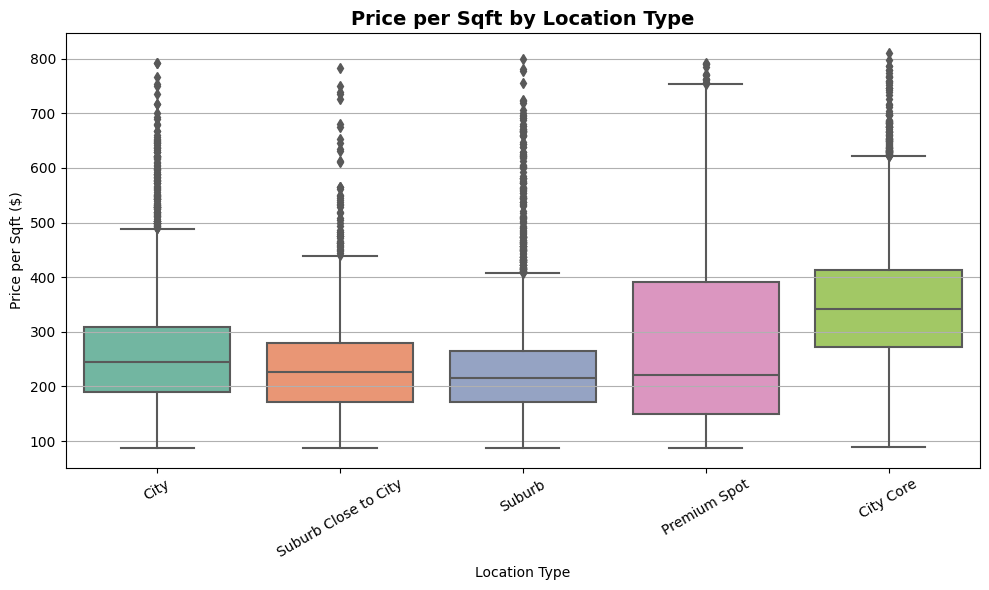

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 지역 유형 포함
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="location_type", y="price_per_sqft", palette="Set2")

# 스타일링
plt.title("Price per Sqft by Location Type", fontsize=14, weight='bold')
plt.xlabel("Location Type")
plt.ylabel("Price per Sqft ($)")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



```
"이 그래프는 지역 유형별 평당가격($/sqft)의 분포를 보여줍니다.
City Core(도심 핵심 지역)는 일반 City나 Premium Spot보다도 평균과 중앙값이 높게 형성되어 있으며,
이는 도심 중에서도 더욱 집중된 상업·생활 인프라 중심 지역에 프리미엄이 붙었음을 의미합니다."

"특히 Nicole이 선호하는 98101–98122 구역은 중심지 중에서도 가장 높은 수요층이 몰리는 구간입니다.
따라서 단순히 '도심'이라기보다 '핵심 도심(Core)'에 사는 대가로 더 높은 단가를 지불해야 함을 보여줍니다."
```

In [201]:
# location_type별 평당가격 요약 (평균 + 중앙값 같이 보기)
summary = df.groupby("location_type")["price_per_sqft"].agg(["count", "mean", "median"]).round(2)
summary = summary.sort_values(by="mean", ascending=False)
display(summary)

,count,mean,median
location_type,,,
City Core,4547,349.200,342.200
Premium Spot,1657,283.700,220.100
City,4426,259.200,243.900
Suburb Close to City,3615,231.800,226.000
Suburb,7352,226.000,215.600


In [213]:

# 아래는 그냥 주택 회전율 관련해서 조사해본것임 -> 투자자들을 위한것임, 니콜라를 위한게 아니야.
# # 1. City Core만 필터링
# core_df = df[df["location_type"] == "City Core"].copy()
# core_df["sold_date"] = pd.to_datetime(core_df["sold_date"])

# # 2. 중복된 house_id 필터링
# duplicate_ids = core_df[core_df.duplicated("house_id", keep=False)]

# # 3. 예산 조건 설정
# price_min = 411607
# price_max = 707700
# pps_min = 272.36
# pps_max = 412.28

# # 4. 예산 조건 필터링 추가
# budget_filtered = duplicate_ids[
#     (duplicate_ids["price"] >= price_min) &
#     (duplicate_ids["price"] <= price_max) &
#     (duplicate_ids["price_per_sqft"] >= pps_min) &
#     (duplicate_ids["price_per_sqft"] <= pps_max)
# ]

# # 5. 정렬 및 결과 확인
# budget_filtered = budget_filtered.sort_values(by=["house_id", "sold_date"])
# budget_filtered


## 가설 2.Nicole의 예산은 도심지역의 중간가격대를 중심으로(approx.411k -707k)으로 맞는 집을 구할 수 있다.(실현가능성평가)  ##

In [214]:
## 2. City Core 기준 적정 편균가 구하기 2) describe ##
# City Core 데이터만 필터링
city_core_df = df[df["location_type"] == "City Core"]

# City Core의 가격 통계 요약
city_core_df["price"].describe().apply(lambda x: round(x, 2))

q1 = city_core_df["price"].quantile(0.25)
q3 = city_core_df["price"].quantile(0.75)

print(f"City Core 중간 가격대 범위: ${int(q1):,} ~ ${int(q3):,}")


# 🏠 City Core 중간 '총 가격' 범위: $411,607 ~ $707,700
# 📐 City Core 중간 '평당 가격' 범위: $272.36 ~ $412.28

City Core 중간 가격대 범위: $411,607 ~ $707,700


In [215]:
print("City Core 전체 매물 수:", len(city_core_df))
print("IQR 내 매물 수:", len(midrange_df))
print(f"비율: {len(midrange_df)/len(city_core_df)*100:.1f}%")

City Core 전체 매물 수: 4547
IQR 내 매물 수: 2273
비율: 50.0%


In [216]:
# 중간 가격대 (IQR) 필터링
midrange_df = city_core_df[
    (city_core_df["price"] >= q1) & (city_core_df["price"] <= q3)
]

# 가격 오름차순으로 정렬
midrange_df = midrange_df.sort_values(by="price").reset_index(drop=True)

# 결과 확인
print(f"City Core 중간 가격대 매물 수: {len(midrange_df):,}개")
midrange_df[["house_id", "price", "sqft_living", "bedrooms", "zipcode", "location_type", "sold_date"]].head()

City Core 중간 가격대 매물 수: 2,273개


,house_id,price,sqft_living,bedrooms,zipcode,location_type,sold_date
0,2741100741,411715,1840,3,98108,City Core,2014-06-04
1,7942601200,412000,1040,2,98122,City Core,2014-10-01
2,5708500208,412000,1240,2,98116,City Core,2014-10-03
3,2848700095,412000,1960,4,98106,City Core,2015-04-02
4,4449800315,412000,1260,2,98117,City Core,2014-06-20


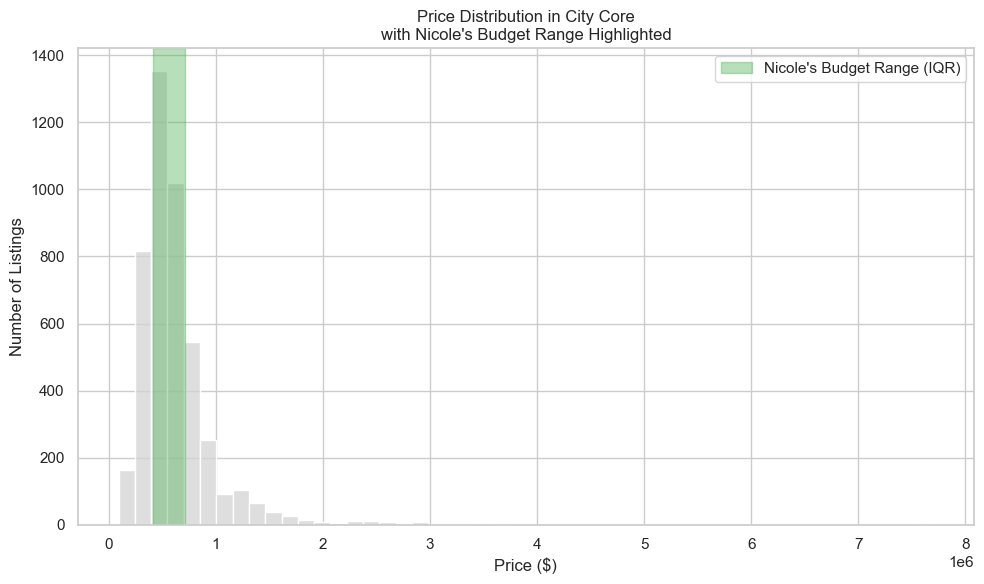

In [217]:
plt.figure(figsize=(10, 6))
sns.histplot(city_core_df["price"], bins=50, kde=False, color="lightgray")

# 중간가격대 범위 시각화
plt.axvspan(q1, q3, color="#4CAF50", alpha=0.4, label="Nicole's Budget Range (IQR)")

plt.title("Price Distribution in City Core\nwith Nicole's Budget Range Highlighted")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 가설 3. Nicole의 예산은 도심지역은 언제 매물이 많이 나왔었고 // 가격은 어땠나? 

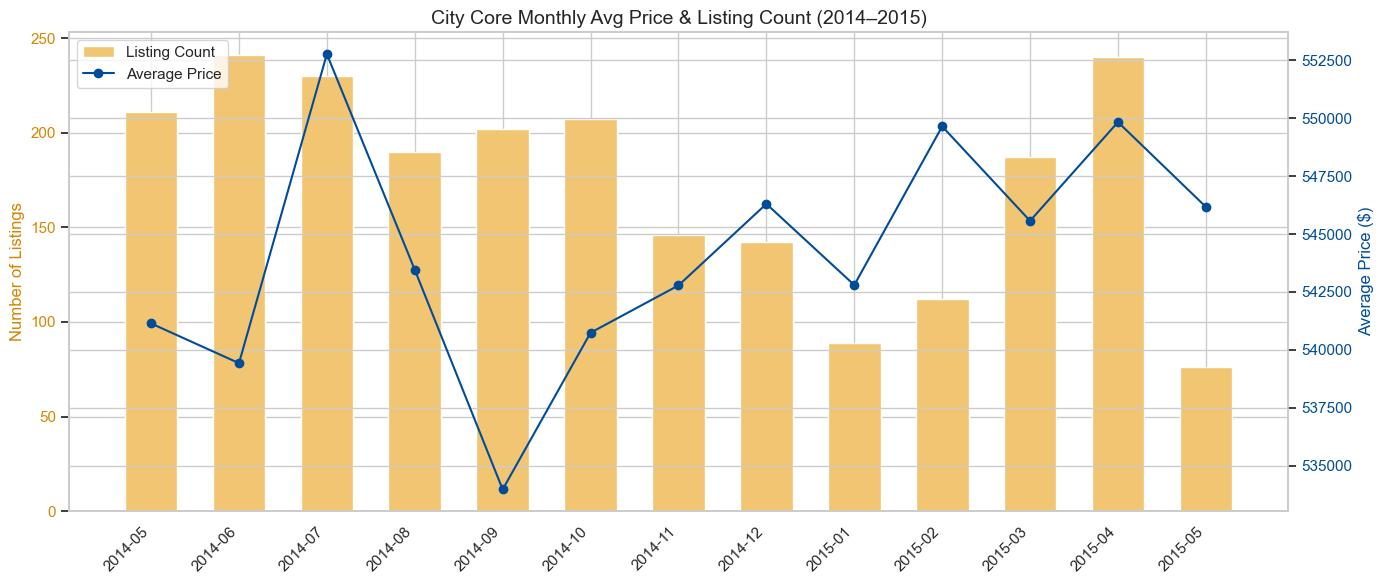

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 정렬 및 라벨 처리
monthly_stats = monthly_stats.sort_values(["year", "month"]).reset_index(drop=True)
monthly_stats["month_str"] = monthly_stats["year"].astype(str) + "-" + monthly_stats["month"].astype(str).str.zfill(2)

# 시각화 시작
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart: Listing count
ax1.bar(monthly_stats["month_str"], monthly_stats["listing_count"],
        color="#f2c572", width=0.6, label="Listing Count")
ax1.set_ylabel("Number of Listings", color="#d68600")
ax1.tick_params(axis='y', labelcolor="#d68600")

# Line chart: Average price
ax2 = ax1.twinx()
ax2.plot(monthly_stats["month_str"], monthly_stats["avg_price"],
         color="#004c99", marker='o', label="Average Price")
ax2.set_ylabel("Average Price ($)", color="#004c99")
ax2.tick_params(axis='y', labelcolor="#004c99")

# X축 처리
ax1.set_xticklabels(monthly_stats["month_str"], rotation=45, ha="right")

# 제목 및 범례
plt.title("City Core Monthly Avg Price & Listing Count (2014–2015)", fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()




```
📈 해석 및 인사이트
매물 출현 시기

2014년엔 6~9월에 가장 많은 매물이 나옴 → 공급 풍부

2015년엔 3~5월에 몰림 → 공급이 앞당겨졌고, 여름 이후는 급감

가격 흐름

2014년은 여름에 평균 가격이 하락

2015년은 봄에 매물이 많음에도 가격이 높음 → 수요가 강했다는 의미

시장 변화 징후

매물 출현 시기가 점점 빨라지고 있음

가격은 연속적으로 오르고 있음 (2015 > 2014)

✅ 데이터 기반 조언 (2016년 1월 기준)
📌 결론 요약:
Nicole, 지금(1월)에 바로 집을 사기보다는, 3~5월까지 기다렸다가 진입하는 것이 더 전략적입니다.

📌 이유:
공급이 증가할 것으로 예상됨

2015년 기준, 매물은 3~5월에 집중 출현

지금 사면 선택지가 적고, 협상력도 낮음

시장 경쟁 판단

2015년에는 매물은 많았지만 가격은 낮지 않았음 → 수요가 강하다는 신호

2016년에도 유사한 패턴 반복될 가능성 높음

기회 타이밍

3~4월은 공급+경쟁 시작 시기

5월 이후는 가격이 오를 수 있음
→ 따라서 4~5월에 빠르게 결정할 수 있도록 지금부터 시장 탐색 시작 추천

💬 한 줄 조언 (슬라이드/보고서용)
"Based on City Core trends, Nicole should wait until March–May 2016 to buy — when listings increase — and be prepared to act quickly before prices rise further."
```

## 추가_ 그냥 시계열로 분석해봄 ##

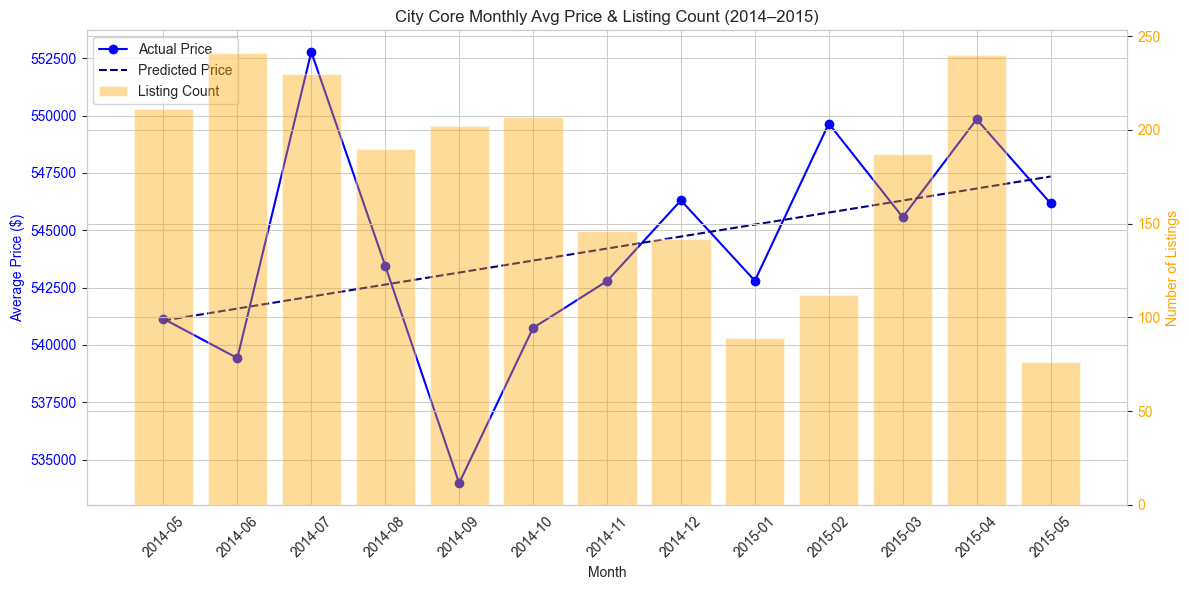

In [193]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. 날짜 번호 부여 (전체 정렬 기준)
monthly_stats = monthly_stats.sort_values(["year", "month"]).reset_index(drop=True)
monthly_stats["month_str"] = monthly_stats["year"].astype(str) + "-" + monthly_stats["month"].astype(str).str.zfill(2)
monthly_stats["month_num"] = np.arange(len(monthly_stats))

# 2. 선형 회귀 (가격 예측)
model = LinearRegression()
model.fit(monthly_stats[["month_num"]], monthly_stats["avg_price"])
monthly_stats["price_pred"] = model.predict(monthly_stats[["month_num"]])

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line: 평균 가격 & 예측
ax1.plot(monthly_stats["month_str"], monthly_stats["avg_price"], marker='o', label="Actual Price", color="blue")
ax1.plot(monthly_stats["month_str"], monthly_stats["price_pred"], linestyle="--", label="Predicted Price", color="navy")
ax1.set_xlabel("Month")
ax1.set_ylabel("Average Price ($)", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("City Core Monthly Avg Price & Listing Count (2014–2015)")
ax1.set_xticklabels(monthly_stats["month_str"], rotation=45)

# Bar: 매물 수
ax2 = ax1.twinx()
ax2.bar(monthly_stats["month_str"], monthly_stats["listing_count"], color="orange", alpha=0.4, label="Listing Count")
ax2.set_ylabel("Number of Listings", color="orange")
ax2.tick_params(axis='y', labelcolor='orange')

# Legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.grid(True)
plt.show()


```
🧠 Nicole에게 해줄 수 있는 말
“최근 시장을 보면, 가격은 2015년 초에 급락했다가 3월부터 급등했고,
현재는 예측선을 웃도는 높은 수준에서 유지되고 있어요.
단기적으로는 다시 가격이 오를 여지가 있으므로,
지금 구매를 고려하는 것은 나쁜 선택은 아니지만, 추가 상승 전에 빠르게 결정하는 것이 유리할 수 있습니다.”

💡 보너스 인사이트
시기	의미
1~2월	최저가 타이밍 (이때 샀으면 최고 이득)
3월 이후	회복기이자 상승 초입 → 타이밍 전략 중요
예측선보다 실제가 높음	수요 증가가 빠르며, 예측보다 더 강한 상승 압력 존재

```